In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_excel("D:/new/transaction_data.csv/Data_Train.xlsx")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#convert date of jounery into datetime format
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [10]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
#extract day,month and year from date of journey using split function
df['Day']=df['Date_of_Journey'].dt.date
df['Month']=df['Date_of_Journey'].dt.month
df['Day']=df['Date_of_Journey'].dt.year


In [12]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3


In [14]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_min']=df['Dep_Time'].str.split(':').str[0].astype(int)

In [15]:
#first exytact the arrival time and remove the day and month from the arrival time column
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,2019,3,22,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,2019,6,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,18,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,16,16


In [17]:
# extract the arrival hour and arrival min from the arrival time column
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,2019,3,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,5,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,2019,6,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,18,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,16,16,21,35


In [19]:
#clean the total stops column
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [20]:
#convert the non stop value into 0 stop value
df['Total_Stops']=df['Total_Stops'].replace("non-stop","0 stop")

In [21]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: count, dtype: int64

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,2019,3,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,5,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,2019,6,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,18,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,16,16,21,35


In [23]:
df['Total_Stops']=df['Total_Stops'].replace("0 stop","0")
df['Total_Stops']=df['Total_Stops'].replace("1 stop","1")
df['Total_Stops']=df['Total_Stops'].replace("2 stops","2")
df['Total_Stops']=df['Total_Stops'].replace("3 stops","3")
df['Total_Stops']=df['Total_Stops'].replace("4 stops","4")

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,2019,3,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,2019,5,5,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,2019,6,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2019,5,18,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2019,3,16,16,21,35


In [25]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [26]:
df['Route_1']=df['Route'].str.split('→').str[0].str.strip()
df['Route_2']=df['Route'].str.split('→').str[1].str.strip()
df['Route_3']=df['Route'].str.split('→').str[2].str.strip()
df['Route_4']=df['Route'].str.split('→').str[3].str.strip()
df['Route_5']=df['Route'].str.split('→').str[4].str.strip()

In [38]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,...,3,22,22,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,...,5,5,5,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,...,6,9,9,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,...,5,18,18,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,...,3,16,16,21,35,BLR,NAG,DEL,NaN,NaN


In [27]:
df['Route_1']=df['Route'].fillna('None')
df['Route_2']=df['Route'].fillna('None')
df['Route_3']=df['Route'].fillna('None')
df['Route_4']=df['Route'].fillna('None')
df['Route_5']=df['Route'].fillna('None')

In [28]:
df.drop('Route',axis=1,inplace=True)

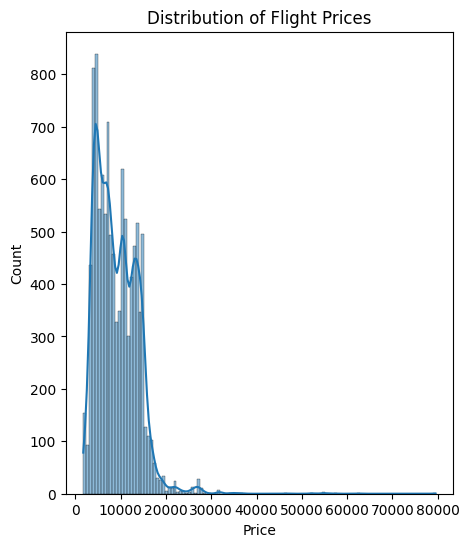

In [29]:
plt.figure(figsize=(5,6))
sns.histplot(df['Price'],kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

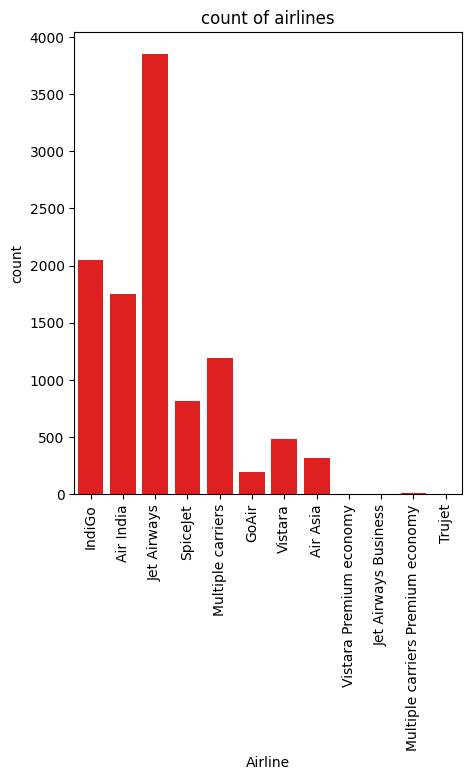

In [30]:
#plot the count of airlines
plt.figure(figsize=(5,6))
sns.countplot(x='Airline',data=df,color='red')
plt.title('count of airlines')
plt.xticks(rotation=90)
plt.show()

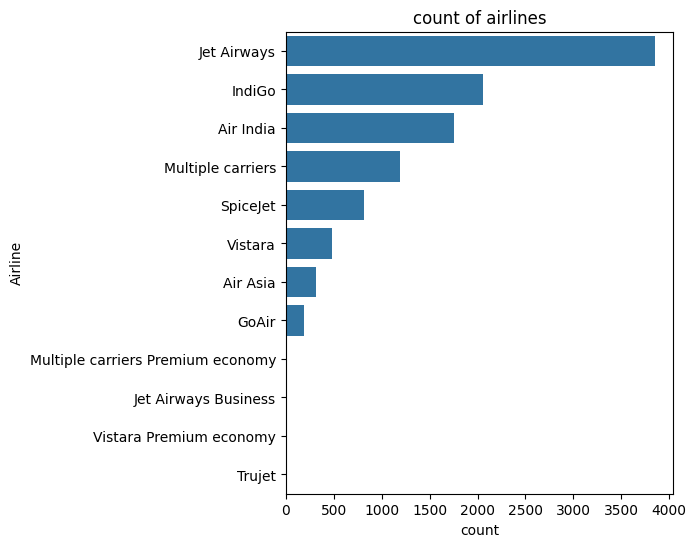

In [31]:
#plot the count of airlines in horizontal
plt.figure(figsize=(5,6))
sns.countplot(y=df['Airline'],order=df['Airline'].value_counts().index)
plt.title('count of airlines')
plt.show()

In [32]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,2019,3,22,22,1,10,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,2019,5,5,5,13,15,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2,No info,13882,2019,6,9,9,4,25,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,2019,5,18,18,23,30,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,2019,3,16,16,21,35,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL


In [33]:
#check central tendency of the price column
print('Mean:',df['Price'].mean())
print('Median:',df['Price'].median())
print('Mode:',df['Price'].mode().iloc[0])

Mean: 9087.21456656057
Median: 8372.0
Mode: 10262


In [34]:
#splitting data into 2 parts- x & y
x=df.drop('Price',axis=1)
y=df['Price']

In [35]:
#splitting data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
#train the model
from sklearn.linear_model import LinearRegression
#load the model
model=LinearRegression()

In [42]:
X_train = pd.get_dummies(X_train, drop_first=True)
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
#fit the model
train_model=model.fit(X_train,Y_train)

In [45]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [51]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [52]:
#elvaute the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(Y_test,Y_pred)
msa=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error for Linear Regression:",mse)
print("Mean Absolute Error for Linear Regression:",msa)
print("R-squared Score for Linear Regression:",r2)

Mean Squared Error for Linear Regression: 5816885.185495147
Mean Absolute Error for Linear Regression: 1427.1951429019932
R-squared Score for Linear Regression: 0.7302258607414488


In [53]:
#model 2 : Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
#load the model
model=DecisionTreeRegressor()
train_model=model.fit(X_train,Y_train)
#make predictions
y_pred=model.predict(X_test)
y_pred
#elvaute the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred) 
msa=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error for Decision Tree Regression:",mse)
print("Mean Absolute Error for Decision Tree Regression:",msa)
print("R-squared Score for Decision Tree Regression:",r2)

Mean Squared Error for Decision Tree Regression: 5631981.066903214
Mean Absolute Error for Decision Tree Regression: 1101.4583163314094
R-squared Score for Decision Tree Regression: 0.7388013006629527


In [54]:
#model 3: SVR
from sklearn.svm import SVR
#load the model
model=SVR(kernel='linear',C=1.0,epsilon=0.1)
train_model=model.fit(X_train,Y_train)
#make predictions
y_pred=model.predict(X_test)
y_pred
#elvaute the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred)
msa=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error for SVR:",mse)
print("Mean Absolute Error for SVR:",msa)
print("R-squared Score for SVR:",r2)

Mean Squared Error for SVR: 12171962.817329528
Mean Absolute Error for SVR: 2225.8018953451283
R-squared Score for SVR: 0.435491558210522


In [55]:
#model 4: KNN
from sklearn.neighbors import KNeighborsRegressor
#load the model
model=KNeighborsRegressor(n_neighbors=5)
train_model=model.fit(X_train,Y_train)
#make predictions
y_pred=model.predict(X_test)
y_pred
#elvaute the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred)
msa=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error for KNN:",mse)
print("Mean Absolute Error for KNN:",msa)
print("R-squared Score for KNN:",r2)

Mean Squared Error for KNN: 7399164.03880206
Mean Absolute Error for KNN: 1393.1628451099673
R-squared Score for KNN: 0.656843302532756


In [56]:
#model 5:random forest
from sklearn.ensemble import RandomForestRegressor
#load the model
model=RandomForestRegressor(n_estimators=100,random_state=9)
train_model=model.fit(X_train,Y_train)
#make predictions
y_pred=model.predict(X_test)
y_pred
#elvaute the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred)
msa=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error for Random Forest Regression:",mse)
print("Mean Absolute Error for Random Forest Regression:",msa)
print("R-squared Score for Random Forest Regression:",r2)

Mean Squared Error for Random Forest Regression: 5006254.089510939
Mean Absolute Error for Random Forest Regression: 1048.4930138021962
R-squared Score for Random Forest Regression: 0.7678211199225426
